In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
### Drop Id column dont reqired this is Unwanted column

In [5]:
df.drop(["Id"],axis=1,inplace=True)   # dropped


In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

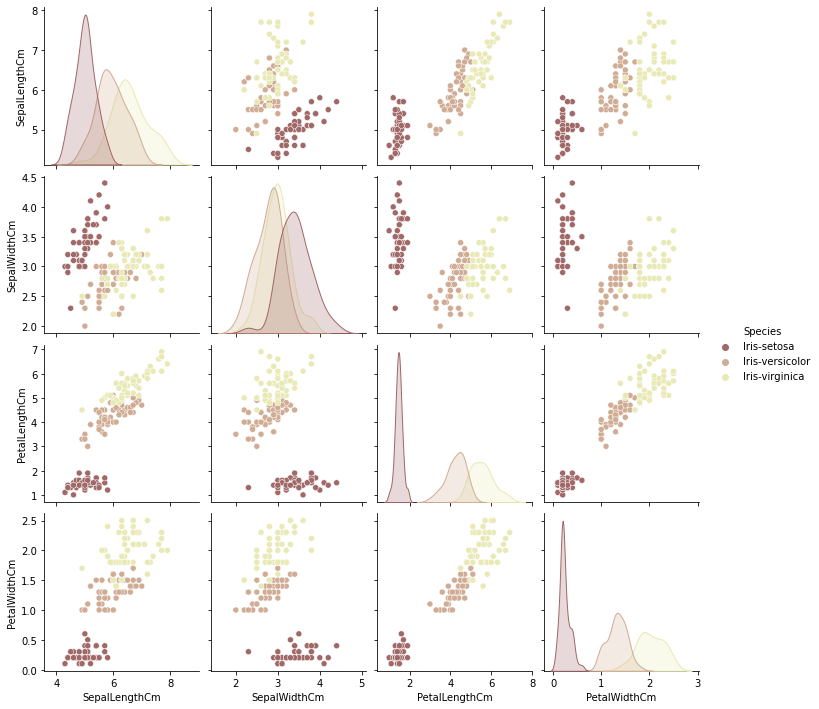

In [10]:
sns.pairplot(data=df,hue='Species',palette='pink')

##### Unsupervised learning

In [11]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
data=df.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

#####  Implementing K-means clustering

In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=100)

In [14]:
#### Finding the best amount of clusters to get most accurate results (KMeans)

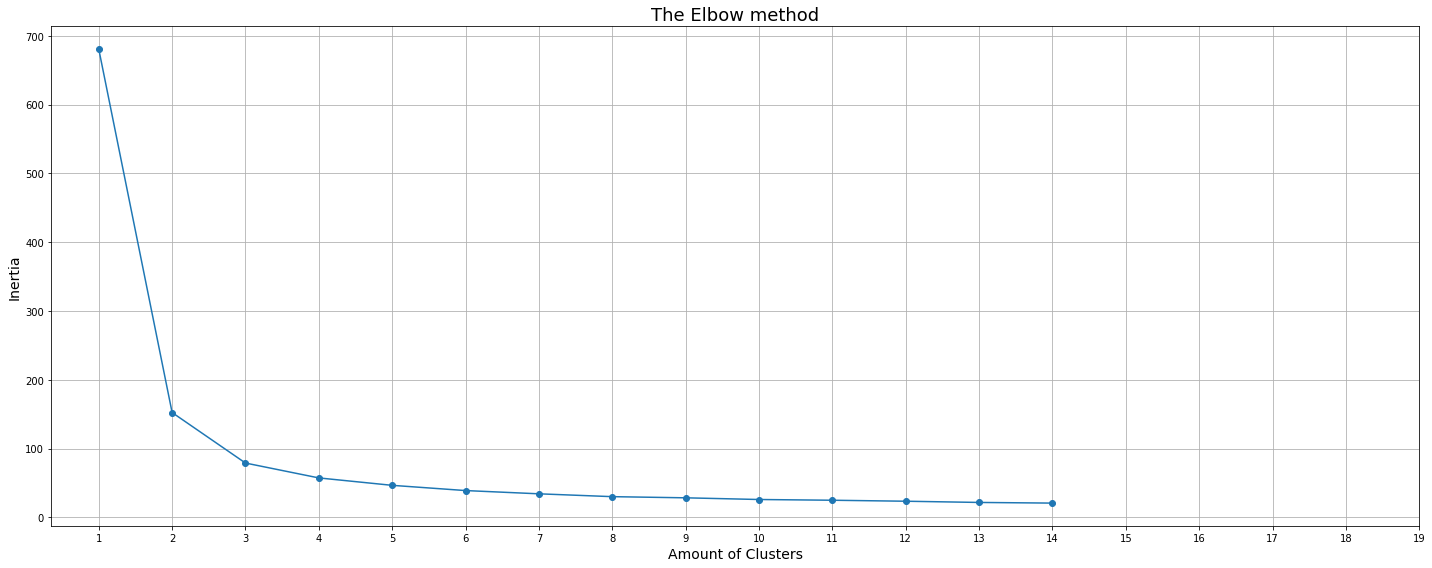

In [15]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of square
for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(20,8))
plt.title("The Elbow method", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [16]:
### Above the figure looks like elbow method

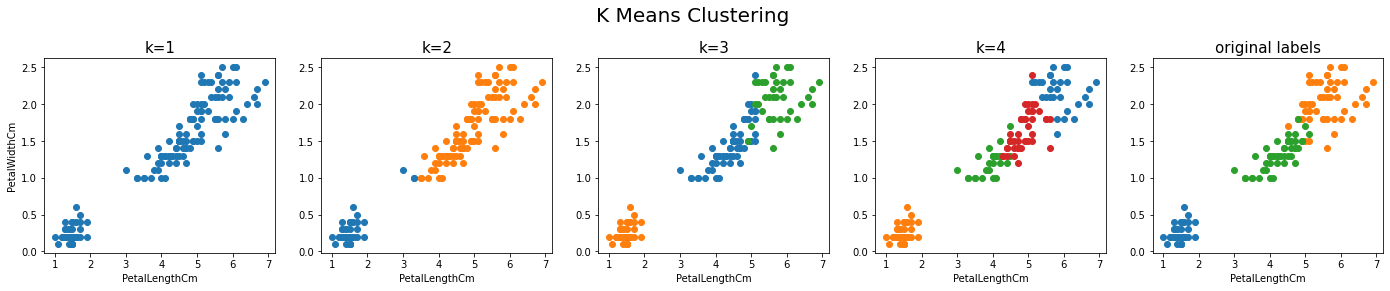

In [17]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title('k=1',fontsize=15)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(data.PetalLengthCm,data.PetalWidthCm)


plt.subplot(1,5,2)
plt.title('k=2',fontsize=15)
plt.xlabel('PetalLengthCm')
kmeans = KMeans(n_clusters=2)
data['Labels']=kmeans.fit_predict(data)
plt.scatter(data.PetalLengthCm[data.Labels == 0],data.PetalWidthCm[data.Labels == 0])
plt.scatter(data.PetalLengthCm[data.Labels == 1],data.PetalWidthCm[data.Labels == 1])


data.drop(['Labels'],axis=1,inplace=True)


plt.subplot(1,5,3)
plt.title('k=3',fontsize=15)
plt.xlabel('PetalLengthCm')
kmeans = KMeans(n_clusters=3)
data['Labels']=kmeans.fit_predict(data)
plt.scatter(data.PetalLengthCm[data.Labels == 0],data.PetalWidthCm[data.Labels == 0])
plt.scatter(data.PetalLengthCm[data.Labels == 1],data.PetalWidthCm[data.Labels == 1])
plt.scatter(data.PetalLengthCm[data.Labels == 2],data.PetalWidthCm[data.Labels == 2])

data.drop(["Labels"],axis=1,inplace=True)


plt.subplot(1,5,4)
plt.title('k=4',fontsize=15)
plt.xlabel('PetalLengthCm')
kmeans = KMeans(n_clusters=4)
data['Labels']=kmeans.fit_predict(data)
plt.scatter(data.PetalLengthCm[data.Labels == 0],data.PetalWidthCm[data.Labels == 0])
plt.scatter(data.PetalLengthCm[data.Labels == 1],data.PetalWidthCm[data.Labels == 1])
plt.scatter(data.PetalLengthCm[data.Labels == 2],data.PetalWidthCm[data.Labels == 2])
plt.scatter(data.PetalLengthCm[data.Labels == 3],data.PetalWidthCm[data.Labels == 3])


data.drop(["Labels"],axis=1,inplace=True)



plt.subplot(1,5,5)
plt.title('original labels',fontsize=15)
plt.xlabel('PetalLengthCm')
plt.scatter(df.PetalLengthCm[df.Species == 'Iris-setosa'],df.PetalWidthCm[df.Species == 'Iris-setosa'])
plt.scatter(df.PetalLengthCm[df.Species == 'Iris-virginica'],df.PetalWidthCm[df.Species == 'Iris-virginica'])
plt.scatter(df.PetalLengthCm[df.Species == 'Iris-versicolor'],df.PetalWidthCm[df.Species == 'Iris-versicolor'])


plt.subplots_adjust(top=.8)
plt.show()

Kmeans visibly did an amazing job with 3 clusters. Except few data points,
I can say prediction is identical to the original with labels.
Which shows that our ELBOW chart was right.

In [18]:
#data['Labels']=kmeans.fit_predict(data)

In [19]:
#df['Species'].value_counts()

In [20]:
#data.head()

In [21]:
#data['Labels'].value_counts()

#### Hierarchical Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc_cluster = AgglomerativeClustering(n_clusters=100) 

In [23]:
## Finding the best amount of clusters to get most accurate results (Hierarchy)

###### Longest Vertical line between Horizontal Lines.


In [24]:
from scipy.cluster.hierarchy import dendrogram,linkage

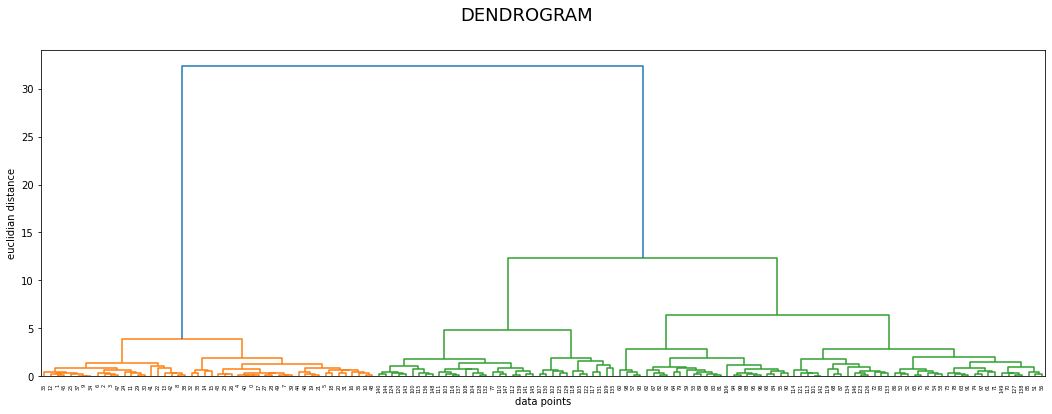

In [25]:
merge=linkage(data,method='ward')

plt.figure(figsize=(18,6))
dendrogram(merge,leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

we see that longest vertical line without any perpendecular matching lines (euclidian distances).
If we draw a horizontal line between that values, 
we will have 2 or 3 interceptions which are representing ideal amount of labels.

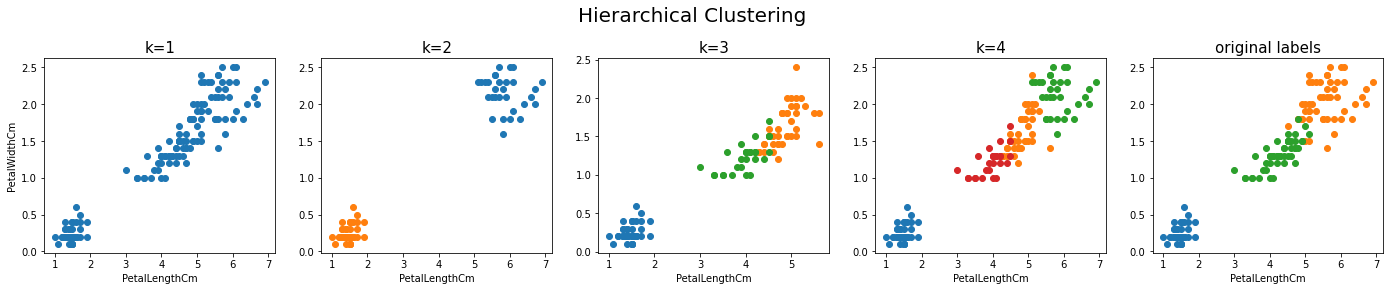

In [26]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title('k=1',fontsize=15)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(data.PetalLengthCm,data.PetalWidthCm)


plt.subplot(1,5,2)
plt.title('k=2',fontsize=15)
plt.xlabel('PetalLengthCm')
hc_cluster = AgglomerativeClustering(n_clusters=2)
data['Labels']=kmeans.fit_predict(data)
plt.scatter(data.PetalLengthCm[data.Labels == 0],data.PetalWidthCm[data.Labels == 0])
plt.scatter(data.PetalLengthCm[data.Labels == 1],data.PetalWidthCm[data.Labels == 1])


data.drop(['Labels'],axis=1,inplace=True)


plt.subplot(1,5,3)
plt.title('k=3',fontsize=15)
plt.xlabel('PetalLengthCm')
hc_cluster = AgglomerativeClustering(n_clusters=3)
data['Labels']=kmeans.fit_predict(data)
plt.scatter(data.PetalLengthCm[data.Labels == 0],data.PetalWidthCm[data.Labels == 0])
plt.scatter(data.PetalLengthCm[data.Labels == 1],data.PetalWidthCm[data.Labels == 1])
plt.scatter(data.PetalLengthCm[data.Labels == 2],data.PetalWidthCm[data.Labels == 2])

data.drop(["Labels"],axis=1,inplace=True)


plt.subplot(1,5,4)
plt.title('k=4',fontsize=15)
plt.xlabel('PetalLengthCm')
hc_cluster = AgglomerativeClustering(n_clusters=4)
data['Labels']=kmeans.fit_predict(data)
plt.scatter(data.PetalLengthCm[data.Labels == 0],data.PetalWidthCm[data.Labels == 0])
plt.scatter(data.PetalLengthCm[data.Labels == 1],data.PetalWidthCm[data.Labels == 1])
plt.scatter(data.PetalLengthCm[data.Labels == 2],data.PetalWidthCm[data.Labels == 2])
plt.scatter(data.PetalLengthCm[data.Labels == 3],data.PetalWidthCm[data.Labels == 3])


data.drop(["Labels"],axis=1,inplace=True)



plt.subplot(1,5,5)
plt.title('original labels',fontsize=15)
plt.xlabel('PetalLengthCm')
plt.scatter(df.PetalLengthCm[df.Species == 'Iris-setosa'],df.PetalWidthCm[df.Species == 'Iris-setosa'])
plt.scatter(df.PetalLengthCm[df.Species == 'Iris-virginica'],df.PetalWidthCm[df.Species == 'Iris-virginica'])
plt.scatter(df.PetalLengthCm[df.Species == 'Iris-versicolor'],df.PetalWidthCm[df.Species == 'Iris-versicolor'])


plt.subplots_adjust(top=.8)
plt.show()

Again k value 3 is more accurate than 2

Reason behind this is basically "iris-setosa" being too easy to separate while the other two is quite mixed and it made our Dendrogram method a bit unclear.


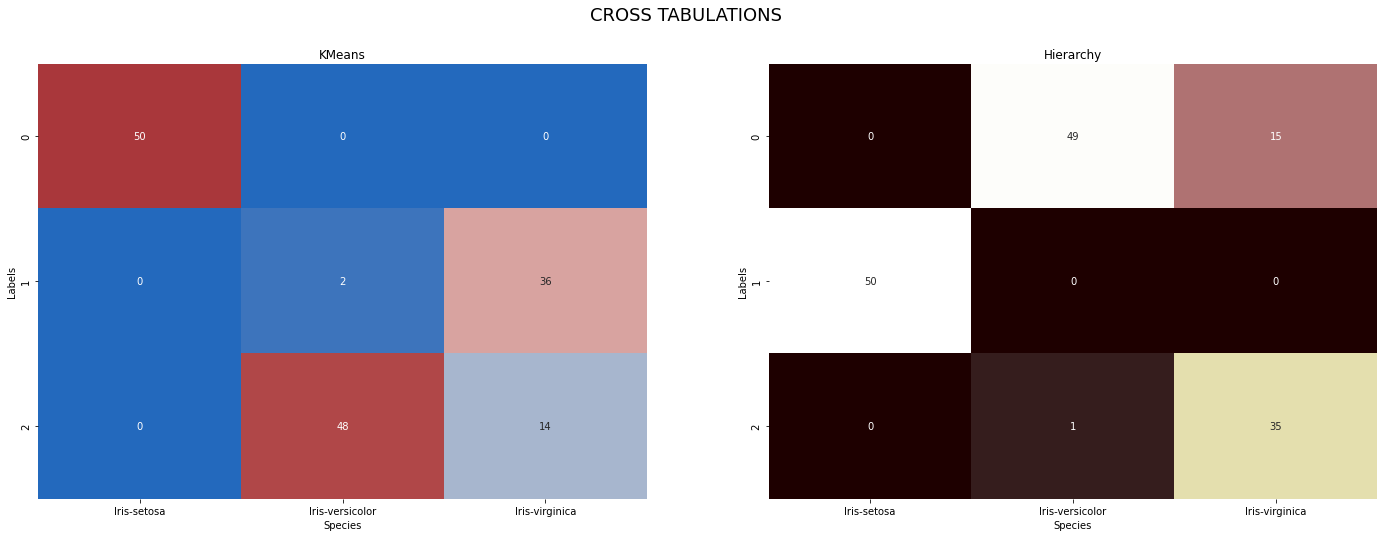

In [33]:
#data.drop(["Labels"],axis=1,inplace=True)

# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(data)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'Labels':kmeans_predict,"Species":df['Species']})
ct1 = pd.crosstab(df1['Labels'],df1['Species'])


# hierarchy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_predict = hc_cluster.fit_predict(data)

# cross tabulation table for Hierarchy
df2 = pd.DataFrame({'Labels':hc_predict,"Species":df['Species']})
ct2 = pd.crosstab(df2['Labels'],df2['Species'])


plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="vlag")

plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="pink")

plt.show()